In [22]:
import numpy as np
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

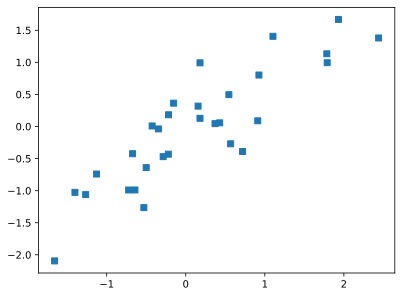

In [29]:
# create data

N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2

# plot data
plt.plot(x, y, 's')
plt.show()

In [30]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [31]:
# learning rate
learning_rate = 0.05

# loss function
loss_fn = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)

In [32]:
# train the model
num_epochs = 500
losses =  torch.zeros(num_epochs)

# Train model
for epoch in range(num_epochs):
    
    # forward pass
    y_hat = ANNreg(x)
    
    # compute loss
    loss = loss_fn(y_hat, y)
    losses[epoch] = loss
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

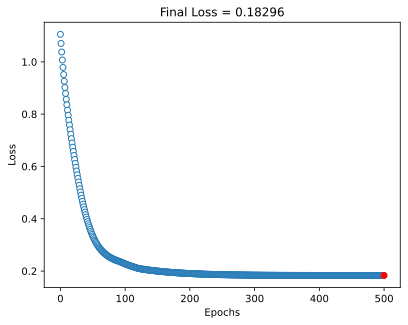

In [33]:
# show the losses

# manually compute losses
# final forward pass
pred = ANNreg(x)

# final loss (MSE)
test_loss = (pred-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(num_epochs,test_loss.detach(),'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Final Loss = %g"%test_loss.item())
plt.show()


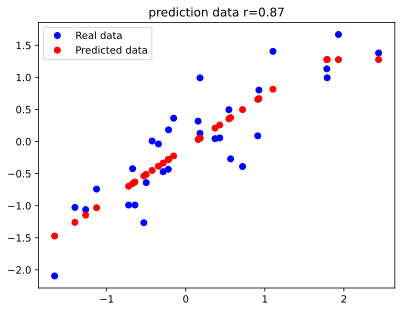

In [34]:
# plot the data
plt.plot(x,y,'bo',label="Real data")
plt.plot(x,pred.detach(),'ro',label="Predicted data")

plt.title(f'prediction data r={np.corrcoef(y.T,pred.detach().T)[0,1]:.2f}')
plt.legend(loc='best')
plt.show()

# Manipulate regression slope

In [41]:
# creates data
def createData(m):
    """
    input: m - slope of y
    create training data with random values and noise
    y = m*x + noise
    :return: x and y 
    """
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N, 1)/2
    
    return x, y

In [50]:
def buildAndTriansModel(x,y):
    """
    Builds and trains a simple artificial neural network (ANN) model using PyTorch.

    Parameters:
    ----------
    x : torch.Tensor
        The input tensor for the model, typically containing the features for training.
    y : torch.Tensor
        The target tensor, typically containing the labels or outputs for training.

    Returns:
    -------
    pred : torch.Tensor
        The predicted output tensor after training the model.
    test_loss : torch.Tensor
        The mean squared error (MSE) loss between the predicted outputs and the true outputs (y).

    """
    # build model
    ANNreg = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
    )    
        # learning rate
    learning_rate = 0.05
    
    # loss function
    loss_fn = nn.MSELoss()
    
    # optimizer
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)
    # train the model
    num_epochs = 500
    losses =  torch.zeros(num_epochs)
    
    # Train model
    for epoch in range(num_epochs):
        
        # forward pass
        y_hat = ANNreg(x)
        
        # compute loss
        loss = loss_fn(y_hat, y)
        losses[epoch] = loss
        
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    pred = ANNreg(x)
    test_loss = (pred-y).pow(2).mean()
    
    return pred, test_loss

In [63]:
# slopes numbers
m_params = np.linspace(-2, 2, 21)
n_exp = 50
results = np.zeros((len(m_params),n_exp,2))



for m in range(len(m_params)):
    
    for i in range(n_exp):
        x,y = createData(m_params[m])
        pred, test_loss = buildAndTriansModel(x,y)
        
        # store final loss and performance
        results[m,i,0] = test_loss
        results[m,i,1] = np.corrcoef(y.T,pred.detach().T)[0,1]
        

results[np.isnan(results)] = 0

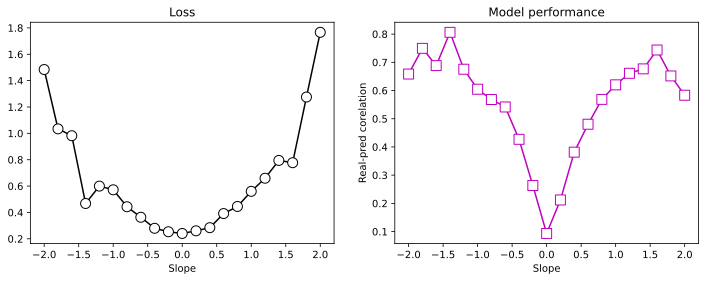

In [64]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(m_params,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel("Slope")
ax[0].set_title("Loss")

ax[1].plot(m_params,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel("Slope")
ax[1].set_ylabel("Real-pred corelation")
ax[1].set_title("Model performance")

plt.show()
